### Basit Dogrusal Regresyon 

In [2]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df =ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df = df.iloc[:, 1:len(df)] #unnamed sutunundan kurtulduk

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


Not: Ortalama ve medyan ya da çeyreklikler arasındaki fark çok değilse standart sapmanın büyük olması problem yaratmaz. Çünkü dağılım çarpık değildir.

In [7]:
df.isnull().values.any()

False

In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [9]:
import seaborn as sns
sns.pairplot(df, kind="reg");

C:\Users\Hakan-PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


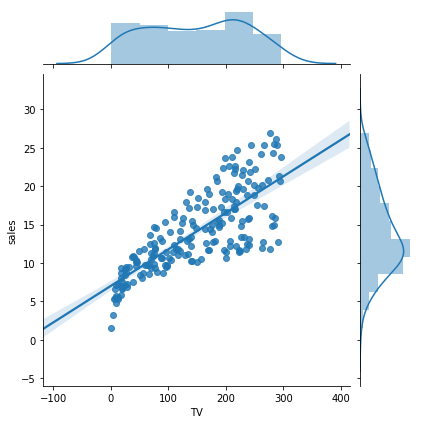

In [10]:
sns.jointplot(x="TV", y = "sales", data = df, kind="reg");

# Statsmodels ile modelleme

Statsmodels tek bir fonksiyonu ile modelin yorumlanmasına 
izin veren tabloyu verebilir. Model yorumundan sonra ise Sklearn kütüphanesi ile makine öğrenmesini sağlayıp test edeceğiz.

In [46]:
import statsmodels.api as sm

In [47]:
X = df[["TV"]]
X[0:5] #Bağımsız değişkenimiz

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [48]:
X = sm.add_constant(X) #matris işlemleri için eklendi

In [49]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [50]:
y = df["sales"] #Bağımlı değişken
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [51]:
lm = sm.OLS(y,X) #Modeli kuruyoruz

In [52]:
model = lm.fit()

Statsmodels kütüphanesinde yer alan OLS fonksiyonunun içerisine değişkenleri tanımlayıp modeli eğittik.

OLS (Ordinary Least Squared): Sıradan en küçük kareler yöntemidir. Doğrusal regresyon modeli kurulurken verilerin ortasından geçen eğime (çizgiye) en az kare farkı ile yaklaşmaya çalışan bir yöntemdir.

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        00:24:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r-squared: bagimsiz degiskenin bagimli degiskendeki degiskenligi aciklama basarisi, aciklanabilirlik orani (şişmeye meyillidir) (Verilerin yerleştirilmiş regresyon çizgisine ne kadar yakın olduğunun istatistiksel bir ölçüsüdür.)

adj. r-squared: r-squared degerinin kisiyi yaniltabilme durumuna karsin duyarliligi daha az olan bir metriktir. (her bir değişkenin bağımlı değişken üzerindeki etkisi ölçülerek daha optimum sonuçlar vermektedir) (Tabloyu yorumlarken bu iki değerin birbirine yakın çıkması önemlidir.)


P-Value: Bu değer bize bağımsız değişkenden çıkan katsayının istatistiksel olarak anlamlı olup olmadığını vermektedir. Bilim dünyasında genel olarak kabul edilen anlamlılık değeri x<0.05'dir. Eğer bu değerin üzerinde bir sonuç çıkıyorsa ilgili bağımsız değişkenin modele etkisi anlamlı değildir.

f-statistic: modelin anlamliliginin anlasilmasi icin kurulan test istatistigi
Prob (F-statistic) -> p-value

In [54]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        00:24:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [56]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [57]:
model.conf_int() #confidence internal (güven aralıkları)

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [58]:
#modelin anlamlılığına iliskin istatistiklere erisme
model.f_pvalue

1.4673897001947095e-42

In [59]:
print("f_pvalue: ","%.3f" % model.f_pvalue)

f_pvalue:  0.000


In [60]:
print("fvalue: ","%.3f" % model.fvalue)

fvalue:  312.145


In [61]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


In [62]:
model.mse_model #hata kareler ortalaması (br basina yapilacak hata)

3314.6181668686486

In [63]:
model.rsquared_adj

0.6099148238341623

In [64]:
model.fittedvalues[0:5] #tahmin edilen degerlere erisim

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [65]:
y[0:5] #gercek degerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [70]:
print("Sales = " + str("%.2f" % model.params[0])+ " + TV * "+ str("%.3f" % model.params[1]))

Sales = 7.03 + TV * 0.048


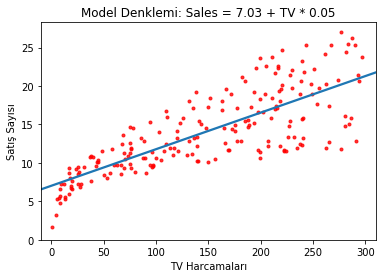

In [71]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV * 0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
X = df[["TV"]]
y = df["sales"]
reg= LinearRegression()
model = reg.fit(X ,y)

Sklearn kütüphanesi ile Statsmodels neredeyse aynı şekilde modeli çalıştırıyor. Ancak Sklearn kütüphanesinde Statsmodels’de olduğu gibi analiz özeti çıkarılmıyor.

In [74]:
model.intercept_ # Kesim noktası

7.032593549127693

In [50]:
model.coef_ # katsayı

array([0.04753664])

In [51]:
model.score(X,y) #r-squared degeri

0.611875050850071

In [53]:
model.predict(X)[0:10] #tahmin edilen değerlere erisim

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

**Tahmin**

Model Denklemi: Sales = 7.03 + TV * 0.05

Orn: 30 br Tv harcamasi oldugunda satislarin tahmini degeri ne olur?

In [93]:
7.03+30*0.04

8.23

In [94]:
X = df[["TV"]]
y = df["sales"]
reg= LinearRegression()
model = reg.fit(X ,y)

In [95]:
model.predict([[30]])

array([8.45869276])

In [96]:
yeni_veri = [[5],[90],[200]]

In [97]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

# MAKİNE ÖĞRENESİNDE ARTIKLARIN/HATALARIN ÖNEMİ

In [98]:
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [100]:
mse = mean_squared_error(y, model.fittedvalues)

In [101]:
mse

10.512652915656759

In [104]:
import numpy as np
rmse = np.sqrt(mse)

In [105]:
rmse 

3.2423221486546887

In [109]:
 reg.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [110]:
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [124]:
karsilastirma = pd.DataFrame({"gercek_y": y[0:10],
                            "tahmin_y" : reg.predict(X)[:10]})
karsilastirma

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [125]:
karsilastirma["hata"] = karsilastirma["gercek_y"] - karsilastirma["tahmin_y"]
karsilastirma

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [126]:
karsilastirma["hata_kare"] = karsilastirma["hata"]**2

In [127]:
karsilastirma

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [128]:
np.sum(karsilastirma["hata_kare"])

92.90350329638103

In [129]:
np.mean(karsilastirma["hata_kare"])

9.290350329638105

In [131]:
np.sqrt(np.mean(karsilastirma["hata_kare"]))

3.048007599996776

**NOT :** Regresyon modellerinde gerçek ve tahmin edilen değerler karşılaştırılıp parametreler bulunur. Yapay sinir ağlarında tahmin edilen değerler ve gerçek değerler sonrası ortaya çıkan hatalar/artıklar ağa tekrar dağıtılıp bir ceza işlemine tabii tutulduktan sonra hatanın küçültülmesi için uğraşılır. Ağaca dayalı modellerde ise model kurulduktan sonra ortaya çıkan artıklar üzerine bir daha model kurulur (editive modeller). Bu modelde bir daha hata elde edilir ve o hatanın üstüne tekrar model kurulur. Bu şekilde hatalar optimize edilmeye çalışılır.

**Olayımız hataların optimize edilmesidir.**


**Hataların dağılımına bakmak önemlidir**

In [132]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

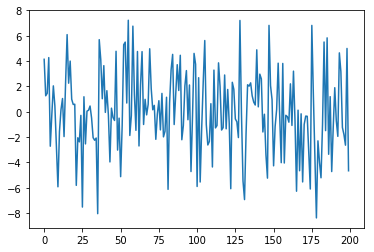

In [133]:
plt.plot(model.resid);